### S04 T01: Transformació Registre Log amb Regular expressions

***- Exercici 1***

+ Estandaritza, identifica i enumera cada un dels atributs / variables de l'estructura de l'arxiu "Web_access_log-akumenius.com" que trobaràs al repositori de GitHub "Data-sources".

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
import re

In [58]:
pd.set_option('display.max_columns', None, 'display.max_colwidth', None)
colname = ['info']
data = pd.read_csv('Web_access_log-akumenius.com.txt', sep = 'delimiter', header =None, 
                   engine = 'python', names = colname)
data[21:24]

,info
21,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-"
22,"www.akumenius.com 66.249.76.216 - - [23/Feb/2014:03:10:31 +0100] ""GET /hoteles-baratos/ofertas-hotel-Club-&-Hotel-Letoonia--en-Fethiye-8460b-destinos.html HTTP/1.1"" 404 3100 ""-"" ""Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)"" VLOG=-"
23,"www.akumenius.com 66.249.76.216 - - [23/Feb/2014:03:10:33 +0100] ""GET /hoteles-baratos/ofertas-hotel-Metropolis-Hotel-en-Kaunas-210244b-destinos.html HTTP/1.1"" 404 3100 ""-"" ""Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)"" VLOG=-"


In [59]:
# first we split the column info by the whitespace, using the metacharacter + (one or more ocurrencies), 
#for convenience we limit the number of splits to 12
df1 = data['info'].str.split(r'([^\s]+)',12, expand= True)
df1[21:24]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
21,,localhost,,127.0.0.1,,-,,-,,[23/Feb/2014:03:10:31,,+0100],,"""OPTIONS",,*,,"HTTP/1.0""",,200,,-,,"""-""","""Apache (internal dummy connection)"" VLOG=-"
22,,www.akumenius.com,,66.249.76.216,,-,,-,,[23/Feb/2014:03:10:31,,+0100],,"""GET",,/hoteles-baratos/ofertas-hotel-Club-&-Hotel-Letoonia--en-Fethiye-8460b-destinos.html,,"HTTP/1.1""",,404,,3100,,"""-""","""Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)"" VLOG=-"
23,,www.akumenius.com,,66.249.76.216,,-,,-,,[23/Feb/2014:03:10:33,,+0100],,"""GET",,/hoteles-baratos/ofertas-hotel-Metropolis-Hotel-en-Kaunas-210244b-destinos.html,,"HTTP/1.1""",,404,,3100,,"""-""","""Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)"" VLOG=-"


We may have some columns that contain no info, we will do a for loop for unique elements of each column and then delete those ones that are empty or have the same element repeated in all rows.

We ´ll define a function to do that, in case we have to use it more times.

In [60]:
def check_empty(df, index_list): 
    for i in range(len(df.columns)):
        if i in index_list: 
            continue 
        else:
            print(df.iloc[:,i].unique(), i)

In [61]:
# we dont want to loop through some columns that obviously contain info, we include the index of this 
# columns in a list 
index_list = [1,3,9,11,13,15,17,19,21,24]
# now we call the fucntion 
check_empty(df1, index_list)

[''] 0
[' '] 2
[' '] 4
['-'] 5
[' '] 6
['-' 'clarcat'] 7
[' '] 8
[' '] 10
[' '] 12
[' '] 14
[' '] 16
[' '] 18
[' '] 20
[' '] 22
['"-"'
 '"http://www.akumenius.com/hoteles-baratos/ofertas-hotel-Playa-Blanca-All-Inclusive-en-Cayo%20Largo_CUBA-62359b.html"'
 '"http://www.akumenius.com/"' ...
 '"http://www.akumenius.com/booking/152186/t/BARCELO%20DOMINICAN%20BEACH/4"'
 '"http://www.akumenius.com/hotelDetailPopup/49612/b"'
 '"http://www.akumenius.com/destinos-baratos/destinos-caracteristicas/hoteles-baratos-en-Phuket_TAILANDIA-con-Windsurf"'] 23


In column with index 7 we have some rows that have the string 'clarcat', let's check some of that rows: 

In [62]:
df1.iloc[:, 7].value_counts()

-          261846
clarcat        27
Name: 7, dtype: int64

We have this info in 27 rows, we will locate the rows to take a look: 

In [63]:
df1[df1.iloc[:, 7] == 'clarcat'].index.tolist()

[51797,
 51799,
 51809,
 51905,
 51906,
 51907,
 51923,
 51924,
 51926,
 51939,
 51940,
 51943,
 97210,
 97211,
 97215,
 153621,
 153622,
 153631,
 195142,
 195143,
 195149,
 196484,
 196486,
 196488,
 230605,
 230606,
 230610]

In [64]:
# take a look at some of the index above: 
df1[51923:51926]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
51923,,www.akumenius.com,,80.28.221.123,,-,,clarcat,,[24/Feb/2014:09:55:54,,+0100],,"""GET",,/awstats.pl?month=02&year=2012&output=main&config=www.akumenius.com&framename=index,,"HTTP/1.1""",,200,,1146,,"""http://www.akumenius.com/awstats.pl?month=02&year=2013&output=main&config=www.akumenius.com&framename=mainright""","""Mozilla/5.0 (X11; U; Linux i686; ca; rv:1.9.2.17) Gecko/20110428 Fedora/3.6.17-1.fc13 Firefox/3.6.17"" VLOG=-"
51924,,www.akumenius.com,,80.28.221.123,,-,,clarcat,,[24/Feb/2014:09:55:54,,+0100],,"""GET",,/awstats.pl?month=02&year=2012&output=main&config=www.akumenius.com&framename=mainleft,,"HTTP/1.1""",,200,,12249,,"""http://www.akumenius.com/awstats.pl?month=02&year=2012&output=main&config=www.akumenius.com&framename=index""","""Mozilla/5.0 (X11; U; Linux i686; ca; rv:1.9.2.17) Gecko/20110428 Fedora/3.6.17-1.fc13 Firefox/3.6.17"" VLOG=-"
51925,,www.akumenius.com,,157.55.33.30,,-,,-,,[24/Feb/2014:09:55:54,,+0100],,"""GET",,/destinos-baratos/destinos-caracteristicas/hoteles-baratos-en-COSTA-DEL-SALENTO_ITALIA-con-Servicio-de-fotocopias,,"HTTP/1.1""",,200,,8230,,"""-""","""Mozilla/5.0 (compatible; bingbot/2.0; +http://www.bing.com/bingbot.htm)"" VLOG=-"


Since we don' t need this column for the purpose of this exercise, we will delete it. We can delete all the above columns except 23 (this column contains info). We will delete columns 0,2,4,5,6,7,8,10,12,14,16,18,20,22

In [65]:
cols = [0,2,4,5,6,7,8,10,12,14,16,18,20,22]
df1.drop(df1[cols], axis =1, inplace = True )

In [66]:
df1[21:24]

,1,3,9,11,13,15,17,19,21,23,24
21,localhost,127.0.0.1,[23/Feb/2014:03:10:31,+0100],"""OPTIONS",*,"HTTP/1.0""",200,-,"""-""","""Apache (internal dummy connection)"" VLOG=-"
22,www.akumenius.com,66.249.76.216,[23/Feb/2014:03:10:31,+0100],"""GET",/hoteles-baratos/ofertas-hotel-Club-&-Hotel-Letoonia--en-Fethiye-8460b-destinos.html,"HTTP/1.1""",404,3100,"""-""","""Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)"" VLOG=-"
23,www.akumenius.com,66.249.76.216,[23/Feb/2014:03:10:33,+0100],"""GET",/hoteles-baratos/ofertas-hotel-Metropolis-Hotel-en-Kaunas-210244b-destinos.html,"HTTP/1.1""",404,3100,"""-""","""Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)"" VLOG=-"


In [67]:
# we will delete "[" and "]" from columns '9' and '11' using regex and replace 
# we use the index to access this columns
df1.iloc[:,2] = df1.iloc[:,2].str.replace(r'\[','', regex = True)
df1.iloc[:,3] = df1.iloc[:,3].str.replace(r'\]','', regex = True)

In [68]:
# now we´ll remove " from the column '13', '17', '23' and '24'. We´ll do it by their indexes
df1.iloc[:,4] = df1.iloc[:,4].str.replace(r'\"','', regex = True)
df1.iloc[:,6] = df1.iloc[:,6].str.replace(r'\"','', regex = True)
df1.iloc[:,9] = df1.iloc[:,9].str.replace(r'\"','', regex = True)
df1.iloc[:,10] = df1.iloc[:,10].str.replace(r'\"','', regex = True)
df1[21:24]

,1,3,9,11,13,15,17,19,21,23,24
21,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,OPTIONS,*,HTTP/1.0,200,-,-,Apache (internal dummy connection) VLOG=-
22,www.akumenius.com,66.249.76.216,23/Feb/2014:03:10:31,+0100,GET,/hoteles-baratos/ofertas-hotel-Club-&-Hotel-Letoonia--en-Fethiye-8460b-destinos.html,HTTP/1.1,404,3100,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html) VLOG=-
23,www.akumenius.com,66.249.76.216,23/Feb/2014:03:10:33,+0100,GET,/hoteles-baratos/ofertas-hotel-Metropolis-Hotel-en-Kaunas-210244b-destinos.html,HTTP/1.1,404,3100,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html) VLOG=-


Now we can see the attributes of a log file. There are different formats for a log file, one of the most common is the **Common Log Format**, that contains the following fields: 

+ The **IP address or host/subdomain** name of the HTTP client that made the HTTP resource request.
+ The identifier used to identify the client making the HTTP request (optional).
+ The username, (or user ID) used by the client for authentication (optional).
+ The **date and time** stamp of the HTTP request.
+ The **HTTP request**, containing the requested resource (index.html), the HTTP method (GET) and the HTTP protocol version.
+ **Status code**: the numeric code indicating the success or failure of the HTTP request.
+ **Bytes** : numeric field containing the number of bytes of data transferred as part of the HTTP request.

In our case we have these described fields and some additional ones. Besides the Common log format, another usual format is the **Combined Log Format**, that contains all of the above info plus: 

+ The **Referrer** : The URL which linked the user to your site.
+ **User_agent** : The Web browser and platform used by the visitor to your site.(Optional)
+ **Cookies** (Optional) 

#### - Exercici 2

Neteja, preprocesa, estructura i transforma (dataframe) les dades del registre d'Accés a la web.

In [69]:
# Firstly, we´ll rename the columns with the names of the attributes shown above: 
mapping = {df1.columns[0] : 'web_host', df1.columns[1]: 'ip_address', df1.columns[2]: 'date_time', 
           df1.columns[3]: 'time_zone', df1.columns[4] : 'request_type', 
           df1.columns[5]: 'requested_resource', df1.columns[6]: 'http_protocol', 
           df1.columns[7]: 'response_code', df1.columns[8] : 'bytes', df1.columns[9]: 'referer', 
           df1.columns[10]: 'user_agent' }
df1 = df1.rename(columns = mapping).copy()
# check random rows
df1.sample(3)

,web_host,ip_address,date_time,time_zone,request_type,requested_resource,http_protocol,response_code,bytes,referer,user_agent
11016,www.akumenius.com,81.45.52.213,23/Feb/2014:10:58:26,+0100,GET,/libraries/jqueryui/css/ui-lightness/jquery.ui.button.css,HTTP/1.1,200,2471,http://www.akumenius.com/escapadas/galicia-724.html,"Mozilla/5.0 (Linux; U; Android 4.1.1; es-es; GT-I8190 Build/JRO03H) AppleWebKit/534.30 (KHTML, like Gecko) Version/4.0 Mobile Safari/534.30 VLOG=-"
151094,localhost,127.0.0.1,26/Feb/2014:06:00:36,+0100,OPTIONS,*,HTTP/1.0,200,-,-,Apache (internal dummy connection) VLOG=-
62561,www.akumenius.com,92.57.179.84,24/Feb/2014:12:57:25,+0100,GET,/libraries/jquery/jquery-1.4.2.min.js,HTTP/1.1,200,72174,http://www.akumenius.com/hoteles-baratos/hoteles-todo-incluido.html?gclid=CLzo9-Xa5LwCFYWWtAod2zUATw,"Mozilla/5.0 (Linux; U; Android 2.2.2; es-es; LG-P970-Orange Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1 MMS/LG-Android-MMS-V1.0/1.2 VLOG=-"


We will split the 'date_time column' so we'll have a column for the date and another column for the time: 

In [71]:
# we´ll replace the first ":" with whitespace in the date_time column and then split it by this whitesapce
df1['date_time'] = df1['date_time'].str.replace(r'\:',' ', 1, regex = True).copy()
df1[['none','date', 'time']] = df1['date_time'].str.split(r'([^\s]+)', 1, expand= True)

We'll also split the 'user_agent' column to keep browser and platform used by the visitor in separate columns: 

In [72]:
# we´ll split the user_agent column by the first parentheses and then remove it 
df1[['none2','browser', 'user_agent']] = df1['user_agent'].str.split(r'([^\(]+)', 1, expand= True)
df1['user_agent'] = df1['user_agent'].str.replace(r'[()"]',' ', regex = True)

In [73]:
# we can drop the columns we don´t need anymore
df1.drop(['date_time', 'none', 'none2'], axis=1, inplace = True)

In [74]:
# we order the columns: 
df1 = df1[['web_host','ip_address', 'date', 'time', 'time_zone', 'request_type', 'requested_resource', 
           'http_protocol', 'response_code','bytes', 'referer', 'browser', 'user_agent' ]]
df1[21:24]

,web_host,ip_address,date,time,time_zone,request_type,requested_resource,http_protocol,response_code,bytes,referer,browser,user_agent
21,localhost,127.0.0.1,23/Feb/2014,03:10:31,+0100,OPTIONS,*,HTTP/1.0,200,-,-,Apache,internal dummy connection VLOG=-
22,www.akumenius.com,66.249.76.216,23/Feb/2014,03:10:31,+0100,GET,/hoteles-baratos/ofertas-hotel-Club-&-Hotel-Letoonia--en-Fethiye-8460b-destinos.html,HTTP/1.1,404,3100,-,Mozilla/5.0,compatible; Googlebot/2.1; +http://www.google.com/bot.html VLOG=-
23,www.akumenius.com,66.249.76.216,23/Feb/2014,03:10:33,+0100,GET,/hoteles-baratos/ofertas-hotel-Metropolis-Hotel-en-Kaunas-210244b-destinos.html,HTTP/1.1,404,3100,-,Mozilla/5.0,compatible; Googlebot/2.1; +http://www.google.com/bot.html VLOG=-


We have some columns with rows that contain "-" and "*", we will replace these characters with NaN to be able to have some control over the null values: 

In [85]:
df1.replace('-', np.nan, inplace = True)
df1.requested_resource.replace('*', np.nan, inplace = True )

In [86]:
df1[21:24]

,web_host,ip_address,date,time,time_zone,request_type,requested_resource,http_protocol,response_code,bytes,referer,browser,user_agent
21,localhost,127.0.0.1,23/Feb/2014,03:10:31,+0100,OPTIONS,NaN,HTTP/1.0,200,NaN,NaN,Apache,internal dummy connection VLOG=-
22,www.akumenius.com,66.249.76.216,23/Feb/2014,03:10:31,+0100,GET,/hoteles-baratos/ofertas-hotel-Club-&-Hotel-Letoonia--en-Fethiye-8460b-destinos.html,HTTP/1.1,404,3100,NaN,Mozilla/5.0,compatible; Googlebot/2.1; +http://www.google.com/bot.html VLOG=-
23,www.akumenius.com,66.249.76.216,23/Feb/2014,03:10:33,+0100,GET,/hoteles-baratos/ofertas-hotel-Metropolis-Hotel-en-Kaunas-210244b-destinos.html,HTTP/1.1,404,3100,NaN,Mozilla/5.0,compatible; Googlebot/2.1; +http://www.google.com/bot.html VLOG=-


This way we have a better view on the missing values on the dataframe: 

In [87]:
df1.isnull().sum()

web_host                  0
ip_address                0
date                      0
time                      0
time_zone                 0
request_type             37
requested_resource    13892
http_protocol            37
response_code             0
bytes                 42298
referer               99505
browser                  42
user_agent               42
dtype: int64

#### - Exercici 3

* Geolocalitza les IP's.

Since we have repeated IP and the IP of the host that we don´t want to geolocate we will create a new dataframe with the unique values and counts for each IP. 

In [94]:
ip_df = df1['ip_address'].value_counts().rename_axis('ip_address').reset_index(name = 'counts')
ip_df

,ip_address,counts
0,66.249.76.216,46382
1,80.28.221.123,14725
2,127.0.0.1,13892
3,217.125.71.222,5201
4,66.249.75.148,3558
...,...,...
2916,84.123.150.27,1
2917,217.130.150.116,1
2918,202.46.52.23,1
2919,216.151.130.170,1


We can see we have 2921 unique IP addresses. We will delete now host ip (127.0.0.1)

In [96]:
ip_df = ip_df.drop(ip_df[ip_df.ip_address == '127.0.0.1'].index)

In [97]:
ip_df

,ip_address,counts
0,66.249.76.216,46382
1,80.28.221.123,14725
3,217.125.71.222,5201
4,66.249.75.148,3558
5,162.243.192.191,2927
...,...,...
2916,84.123.150.27,1
2917,217.130.150.116,1
2918,202.46.52.23,1
2919,216.151.130.170,1


To geolocate the IP addresses we will import geolite2 library: 

In [92]:
from geolite2 import geolite2
reader = geolite2.reader()

In [93]:
# we will define a function for each attribute we are interested in 
# To avoid stopping the programm, return nan if ip can't be readed or can't access the attribute 

# accessing the continent: 
def IP_info_continent(ip):
    try: x = reader.get(ip)
    except ValueError: return np.nan
    try: return x['continent']['names']['en'] if x is not None else np.nan
    except KeyError: return np.nan
    
# accessing the country: 
def IP_info_country(ip):
    try:  x = reader.get(ip)
    except ValueError: return np.nan 
    try: return x['country']['names']['en'] if x is not None else np.nan
    except KeyError:  return np.nan
    
# access the city: 
def IP_info_city(ip):
    try: x = reader.get(ip)
    except ValueError: return np.nan
    try: return x['city']['names']['en'] if x is not None else np.nan
    except KeyError: return np.nan

# acces the latitude 
def IP_info_latitude(ip):
    try:  x = reader.get(ip)
    except ValueError:  return np.nan
    try: return x['location']['latitude']  if x is not None else np.nan
    except KeyError: return np.nan

# access the longitude: 
def IP_info_longitude(ip):
    try: x =reader.get(ip)
    except ValueError: return np.nan
    try: return x['location']['longitude']  if x is not None else np.nan
    except KeyError: return np.nan
    

In [100]:
# now we call this functions to add columns with these attributes we have selected into new columns on our dataframe 
# we use the apply method 
ip_df['continent'] = ip_df['ip_address'].apply(IP_info_continent)
ip_df['country'] = ip_df['ip_address'].apply(IP_info_country)
ip_df['city'] = ip_df['ip_address'].apply(IP_info_city)
ip_df['latitude'] = ip_df['ip_address'].apply(IP_info_latitude)
ip_df['longitude'] = ip_df['ip_address'].apply(IP_info_longitude)

In [101]:
ip_df

,ip_address,counts,continent,country,city,latitude,longitude
0,66.249.76.216,46382,North America,United States,Mountain View,37.4192,-122.0574
1,80.28.221.123,14725,Europe,Spain,Torrejón de Ardoz,40.4554,-3.4697
3,217.125.71.222,5201,Europe,Spain,Seville,37.3824,-5.9761
4,66.249.75.148,3558,North America,United States,Mountain View,37.4192,-122.0574
5,162.243.192.191,2927,North America,United States,New York,40.7308,-73.9975
...,...,...,...,...,...,...,...
2916,84.123.150.27,1,Europe,Spain,Gandia,38.9667,-0.1833
2917,217.130.150.116,1,Europe,Spain,NaN,40.4172,-3.6840
2918,202.46.52.23,1,Asia,China,Shenzhen,22.5333,114.1333
2919,216.151.130.170,1,North America,United States,San Jose,37.4250,-121.9460


Let's check missing values: 


In [102]:
ip_df.isnull().sum()

ip_address      0
counts          0
continent       1
country        15
city          364
latitude        1
longitude       1
dtype: int64

Now we can calculate the percentages of visits to the web from each continent: 

In [119]:
total = ip_df.counts.sum()
# we group by continent and drop the one missing value in the 'continent' column
ip_per_continent = ip_df.groupby('continent', dropna= True).sum()
ip_per_continent_percent = ip_per_continent['counts'].apply(lambda x : str(round((x*100/total), 2)) + '%')
ip_per_continent_percent

continent
Africa             0.1%
Asia              2.98%
Europe           66.29%
North America    29.18%
Oceania           0.03%
South America      1.4%
Name: counts, dtype: object

We can see Europe has more than 65 % of connections, and between Europe and North America comes 95 % of the web traffic. 

### - Exercici 3

+ Mostra'm la teva creativitat, Sorprèn-me fes un pas més enllà amb l'anàlisi anterior.

We´ll create a world map with geopandas library to be able to see where most connections come from. 

In [120]:
# import geopandas to create a map 
import geopandas as gpd
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

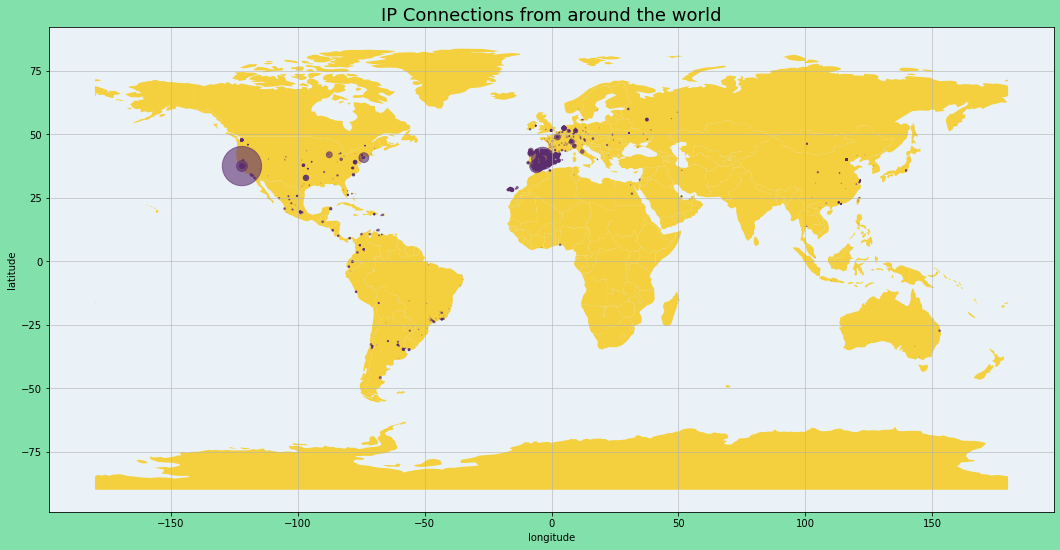

In [125]:
fig, ax = plt.subplots(figsize=(18,14))
fig.patch.set_facecolor('#82E0AA')
ax.set_facecolor('#EAF2F8')
# plot map on axis
world = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
# use the counts column to define the size of the marker 
size = ip_df.counts/30
world.plot(color="#F4D03F", ax=ax)
# plot points
ip_df.plot(x="longitude", y="latitude", kind="scatter", color = '#5B2C6F', alpha = 0.6, 
         s= size, ax=ax)
ax.set_title('IP Connections from around the world', fontsize = 18)
ax.grid(visible=True, alpha=0.7)
plt.show()

We can see the distribution of the connections from around the world, since most of these come from Europe and Spain, we can zoom in these two areas to have a better look: 

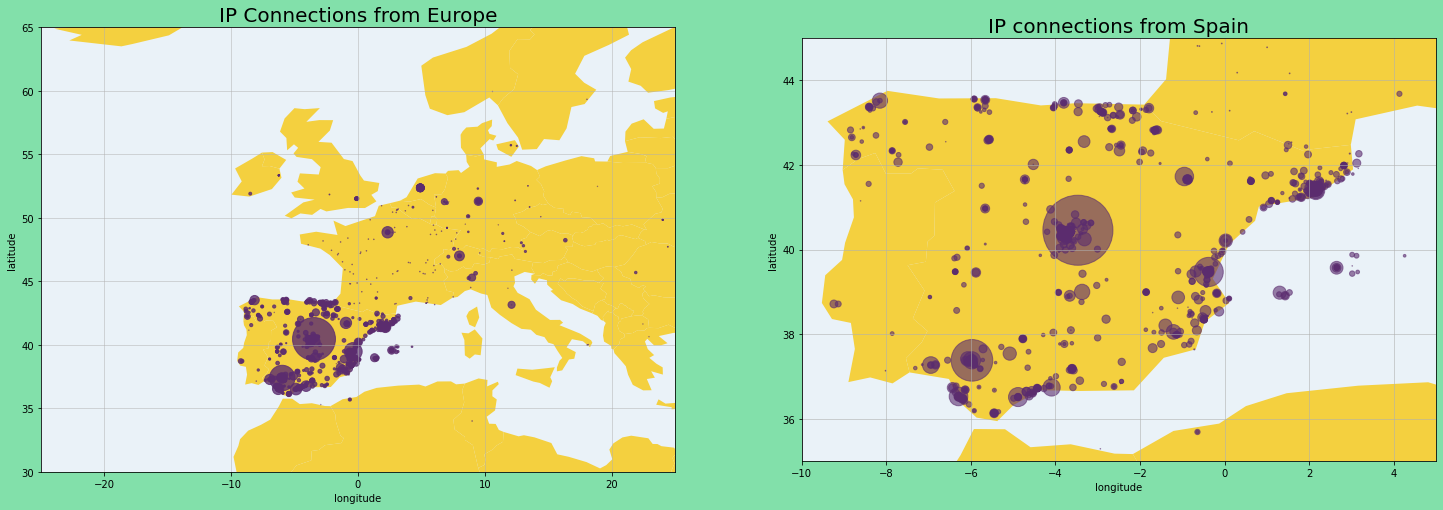

In [132]:
fig = plt.figure()
fig.patch.set_facecolor('#82E0AA')

ax1 = fig.add_subplot(121)
size = ip_df.counts/8
world.plot(color="#F4D03F", ax=ax1, figsize = (12,9))
ip_df.plot(x="longitude", y="latitude", kind="scatter", color = '#5B2C6F' , alpha = 0.8,
           figsize = (25,12),s=size , ax=ax1)
ax1.grid(visible=True, alpha=0.6)
ax1.set_xlim([-25, 25])
ax1.set_ylim([30, 65])
ax1.set_facecolor('#EAF2F8')
ax1.set_title('IP Connections from Europe', fontsize = 20)

ax2 = fig.add_subplot(122)
size = ip_df.counts/3
world.plot(ax=ax2, color="#F4D03F", figsize = (13,10))
ip_df.plot(x="longitude", y="latitude", kind="scatter", color = '#5B2C6F' , alpha = 0.6, 
           s= size, figsize= (25,12), ax=ax2)
ax2.grid(visible=True, alpha=0.7)
ax2.set_xlim([-10, 5])
ax2.set_ylim([35, 45])
ax2.set_title('IP connections from Spain', fontsize = 20)
ax2.set_facecolor('#EAF2F8')
plt.show()

Now we can see where the traffic of the web comes from. If we want to see the name of each of these cities we can plot an interactive map, this exercise is continued in the notebook **'s04T01 interactive map' in the same repository.**

In [133]:
#We will save this ip_df dataframe : 
ip_df.to_csv('ip_df.csv', index = False)